## Load cleaned TS

In [1]:
import numpy as np
import os

def loadnpy(filename):
    return np.load(filename)


# dir_path = 'dataset/time_series/'
dir_path = '/app/Spotify-Dataset-Analysis-2/dataset/cleaned_time_series/'

len_threshold = 1280
X, y, ids = [], [], []

for file in os.listdir(dir_path):
    if os.path.splitext(file)[1] != '.npy':
        continue

    split = file.split("_")
    ids.append(split[0])  # track_id
    y.append(split[1][:-4])  # genre
    ts = loadnpy(dir_path + file)

    if len(ts) > len_threshold:
        ts = ts[0:len_threshold]
    else:
        # pad = [np.mean(ts[:-5])] * (len_threshold-len(ts)) # fill by mean value of last n observations
        pad = [ts[-1]] * (len_threshold - len(ts))  # fill with last observation
        ts = np.append(ts, pad)

    X.append([ts])

X, y, ids = np.array(X), np.array(y), np.array(ids)

In [2]:
example = X[0][0]

In [3]:
import pandas as pd

example = pd.Series(example)

In [4]:
type(example)

pandas.core.series.Series

## Piecewise Aggregate Approximation

In [21]:
import matplotlib.pyplot as plt

def plot_PAA(y, y_paa, paa):
    fig, ax1 = plt.subplots(figsize=(20,8))  # Imposta le dimensioni del grafico
    plt.grid(False)
    ax1.plot(y.index, (y - y.mean()) / y.std(), label="ts")
    ax2 = ax1.twiny()
    ax2.plot(y_paa.index, (y_paa - y_paa.mean()) / y_paa.std(), "r-", label="paa")
    plt.grid(False)
    plt.legend([f"num_intervals={paa.get_params()['num_intervals']}"])
    plt.show()

In [22]:
from sktime.transformations.panel.dictionary_based import PAAlegacy
paa = PAAlegacy(num_intervals=200)

In [23]:
y_paa = paa.fit_transform(example)

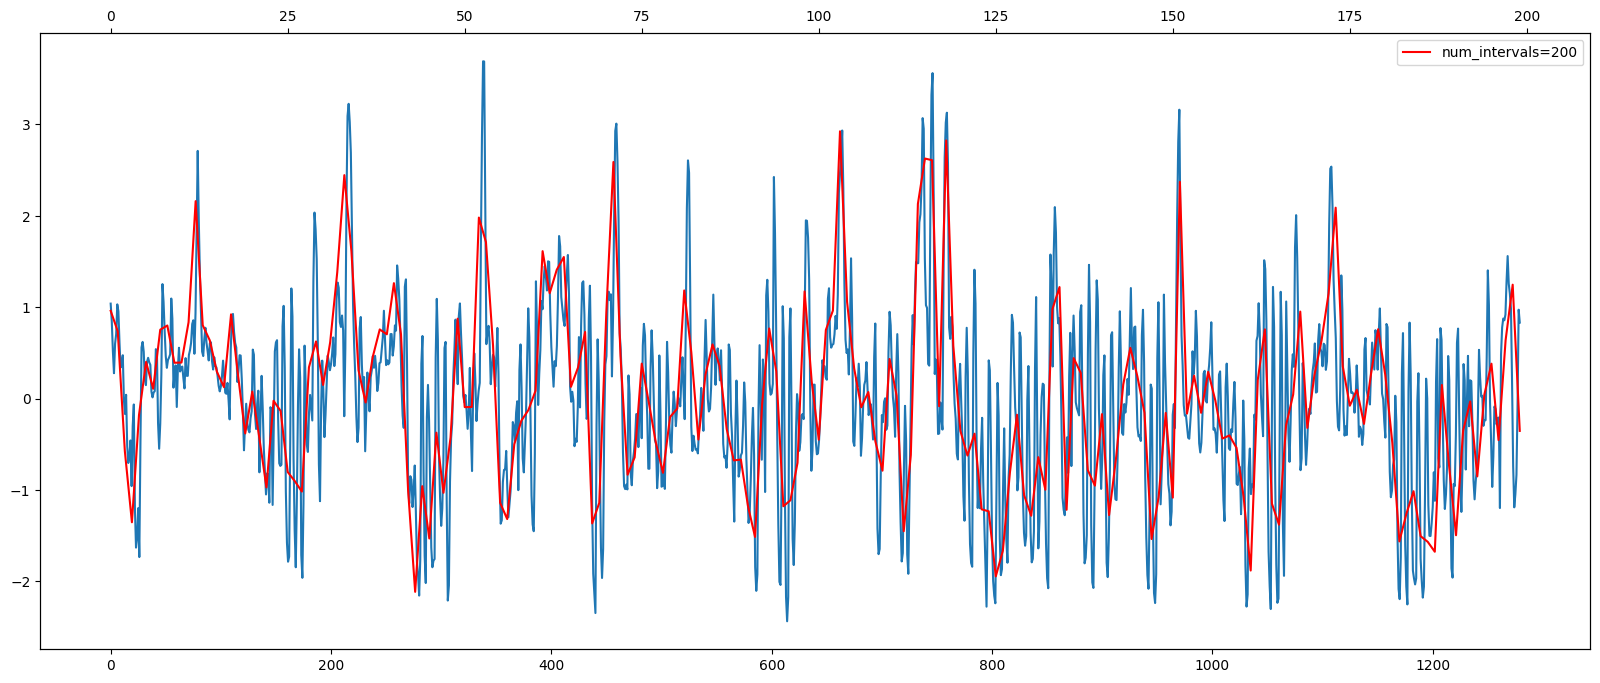

In [24]:
plot_PAA(example,y_paa,paa)

## Symbolic Aggregate Approximation

In [26]:
from sktime.transformations.series.sax import SAX

In [27]:
sax = SAX(word_size=20, alphabet_size=50)

In [28]:
y_sax = sax.fit_transform(example)

In [30]:
import matplotlib.pyplot as plt

def plot_SAX(y, y_sax, sax):
    fig, ax1 = plt.subplots(figsize=(20,8))
    plt.grid(False)
    ax1.plot(y.index, (y - y.mean()) / y.std(), label="ts")
    ax2 = ax1.twiny()
    ax2.plot(y_sax.index, (y_sax - y_sax.mean()) / y_sax.std(), "r-", label="sax")
    plt.grid(False)
    plt.legend([f"alphabet_size={sax.get_params()['alphabet_size']}, frame_size={sax.get_params()['frame_size']}, word_size={sax.get_params()['word_size']} "])
    plt.show()

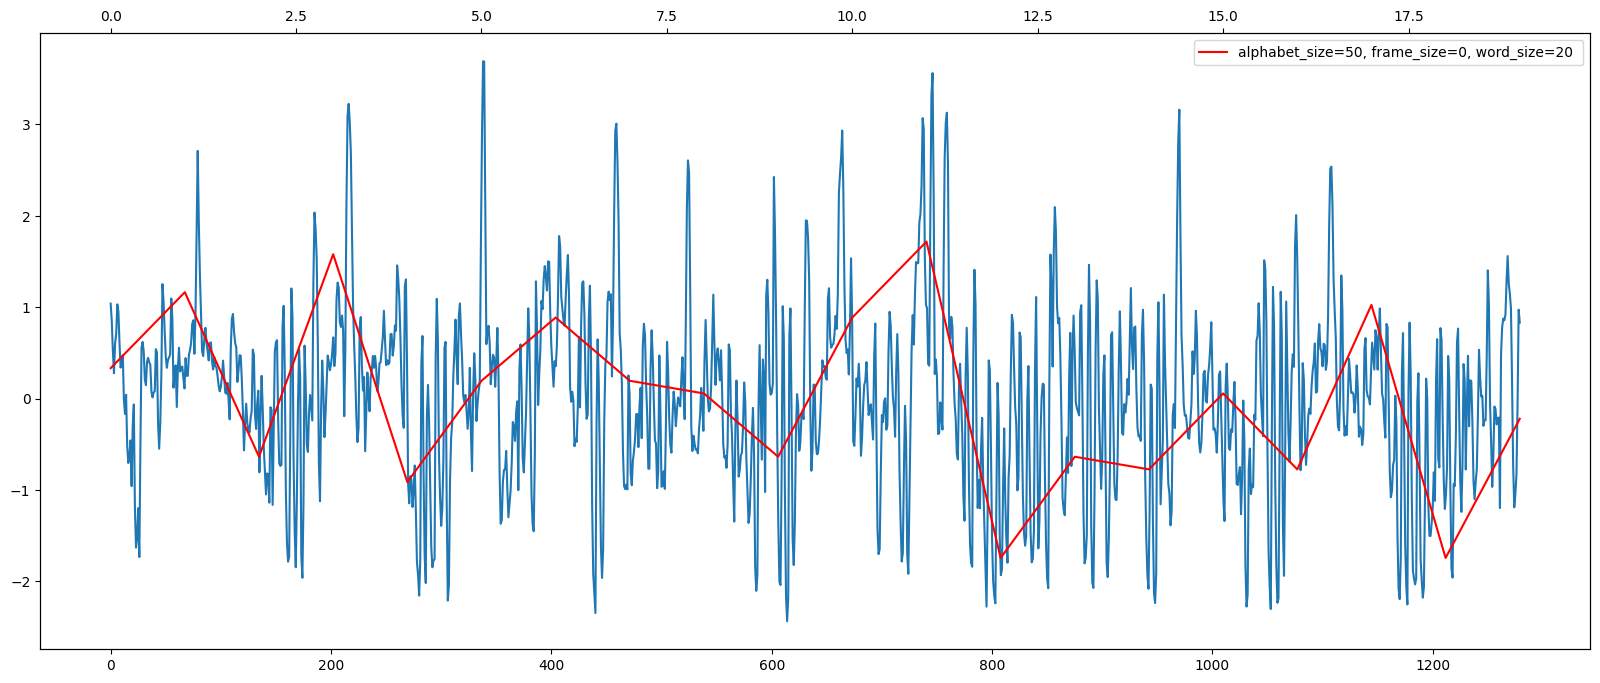

In [31]:
# plot_SAX(example,y_sax,sax)

<class 'int'>


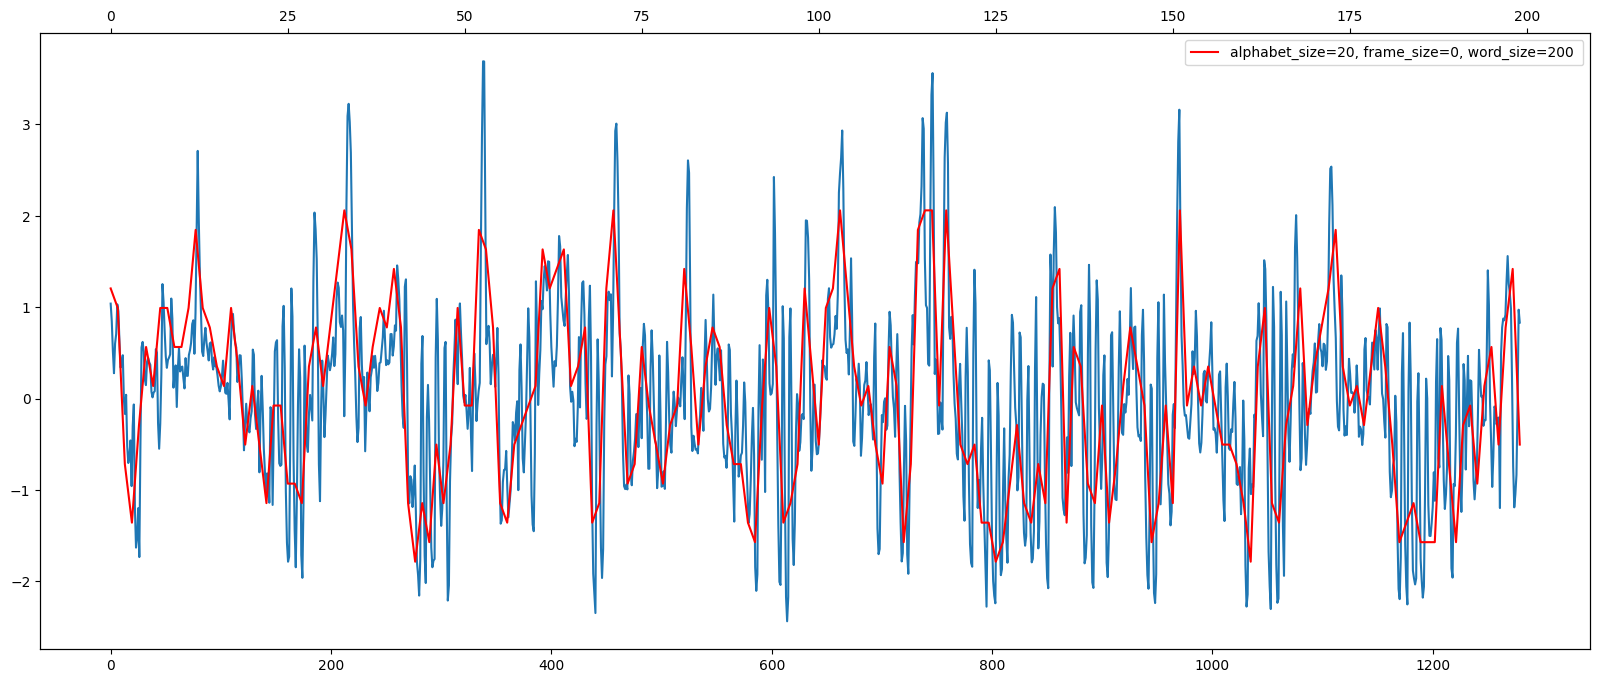

In [32]:
from sktime.transformations.series.sax import SAX
from sklearn.model_selection import cross_val_score
X = example
# Definizione dei possibili valori dei parametri da testare
# word_sizes = np.arange(100,1000,100)
word_sizes = [200]
alphabet_sizes = [20] # alphabet_size sembra non avere nessun effetto migliorativo
# alphabet_sizes = np.arange(100,1000,100)


print(type(word_sizes[0]))

best_score = -1
best_params = None

# Grid search sui parametri
for word_size in word_sizes:
    for alphabet_size in alphabet_sizes:
        sax = SAX(word_size=int(word_size), alphabet_size=int(alphabet_size))
        y_sax = sax.fit_transform(example)
        plot_SAX(example,y_sax,sax)

